<h1>Homework 1</h1>
<h3>K - Nearest Neighbors </h3>
<p>This section comprehends point from 1 to 7. Code is commented to </p>
<br>
<p>Note that point 3. requires data to be splitted <i>'into train, validation and test sets in proportion 5:2:3'</i> and consequentially I assumed that all training phases in further computations are done on the train set only (that is 50% on the data). Besides point 16. says to <i>'Merge the training and validation split. You should now have 70% training and 30% test data.'</i> so I assumed that only for further points the training phase will be done on the previous train+validation set. </p>

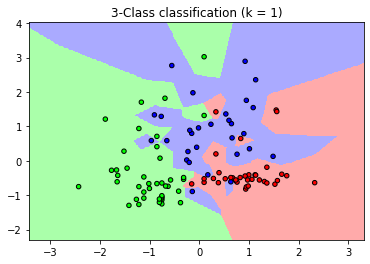

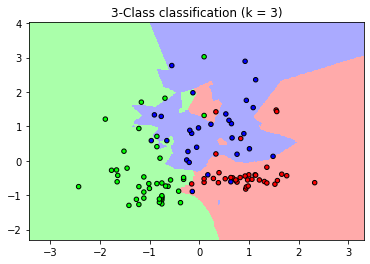

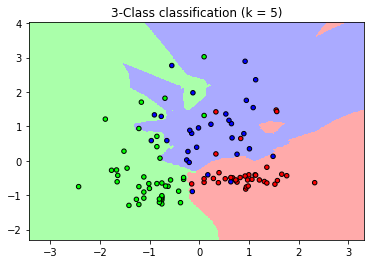

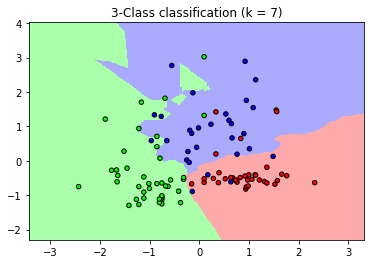

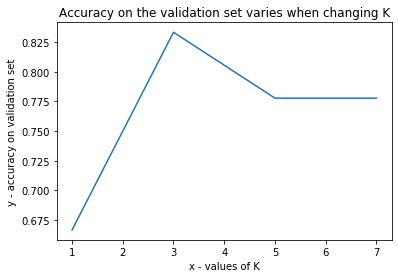

Use the best value of K and evaluate the model on the test set. How well does it works?
Accuracy with K =  3 evaluated on the test set: 0.741


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, model_selection, metrics, preprocessing

# load wine dataset (1)
wine = datasets.load_wine()

# we choose only the first two attributes (2) 
X = wine.data[:, :2]
y = wine.target

# divide to get the right percentage of train data (3)
X_t, X_test, y_t, y_test = model_selection.train_test_split(X, y, random_state=np.random.randint(0,100), test_size=0.3)

# divide training total into validation and training (3)
# test size here means the size the validation set 
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_t, y_t, random_state=np.random.randint(0,100), test_size=0.14)

# using a Standard scaler to normalize data since ML algorithms work better on normalized data
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# step size in the mesh - related to graph
h = .02

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# array of variuos Ks to try KNN with
ks = [1,3,5,7]

#accurancy array, needed later to plot accurancy of various clf on validation set
acc_arr = []

# for which iterates every K and plots the relative data & decision boundaries  (4)
for k in ks:
    n_neighbors = k;
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    
    # train the classifier on the training set
    clf.fit(X_train, y_train)

    # plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    
    # arange method return evenly spaced data
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # test the classifier on the test set
    # ravel method returns a contigous flattened array
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)" % (n_neighbors))
    
    #append accuracy score on validation set to list
    acc_arr.append(clf.score(X_valid, y_valid))
plt.show()

# setting up graph for accuracy on validation set (5)
x = ks
y = acc_arr
plt.plot(x,y)
plt.xlabel("x - values of K")
plt.ylabel("y - accuracy on validation set")
plt.title("Accuracy on the validation set varies when changing K")
plt.show()

#choose the best value of K from the score on the validation set (7)
k_best_index = acc_arr.index(max(acc_arr))
k_best = ks[k_best_index]

print("Use the best value of K and evaluate the model on the test set. How well does it works?")
print("Accuracy with K = ", k_best, "evaluated on the test set: %.3f" %(clf.score(X_test, y_test)))

<h3> Linear SVM section </h3>
<p> Which contains points from 8 to 11 </p>

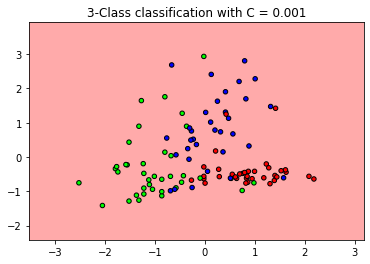

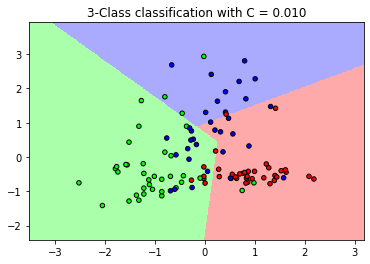

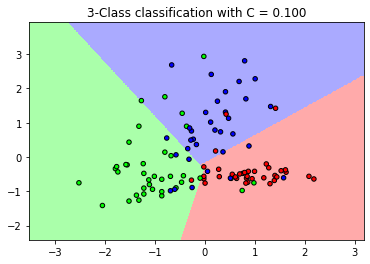

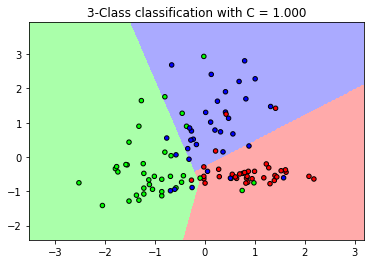

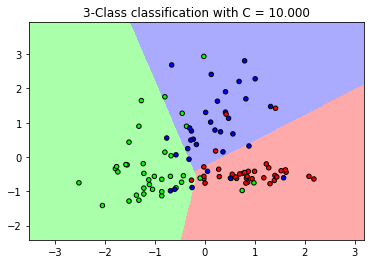

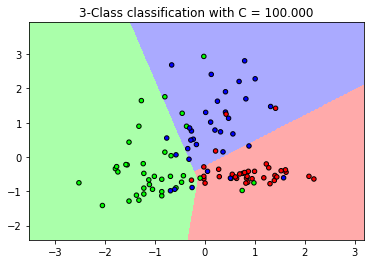

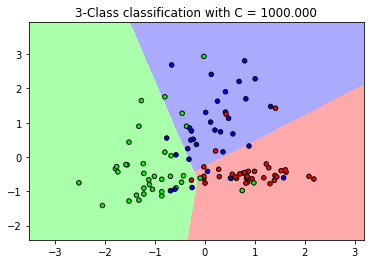

Use the best value of C and evaluate the model on the test set. How well does it works?
Accuracy with C =  0.1 evaluated on the test set: 0.722222


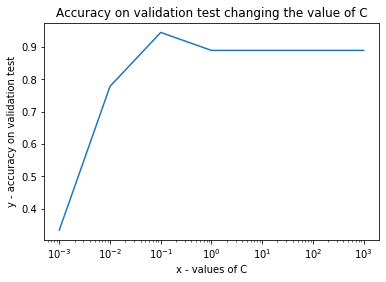

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets, model_selection, svm, preprocessing, metrics 

#lod wine dataset
wine = datasets.load_wine()

#we choose only the first two attributes
X = wine.data[:, :2]
y = wine.target

# divide to get the right percentage of train data
X_t, X_test, y_t, y_test = model_selection.train_test_split(X, y, random_state=np.random.randint(0,100), test_size=0.3)

# divide training total into validation and training
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_t, y_t, random_state=np.random.randint(0,100), test_size=0.14)

# various C values (8)
C_val = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# using a Standard scaler to normalize data since ML algorithms work better on normalized data
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# step size in the mesh
h = .02

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# accurancy array, needed later to plot accurancy of various clf on validation set
acc_arr = []

# for which iterates every C and plots the relative data & decision boundaries (8)
for c in C_val:
    
    # we create an instance of Linear SVC and fit the data.
    clf = svm.SVC(kernel='linear', C=c)
    # train the classifier on the training set
    clf.fit(X_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    
    #the arange method return evenly spaced data
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # test the classifier on the test set
    # ravel method returns a contigous flattened array
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light) 

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification with C = %.3f" %( c))
    
    #append accuracy score on validation set to list
    acc_arr.append(clf.score(X_valid, y_valid))
plt.show()

#plot the accuracy on the validation set (9) - plot better the graph
x = C_val
y = acc_arr
plt.plot(x,y)
plt.xlabel("x - values of C")
plt.ylabel("y - accuracy on validation test")
plt.title("Accuracy on validation test changing the value of C")
plt.xscale('log')
plt.show
 
# choose the best C value based on the validation set
C_best_index = acc_arr.index(max(acc_arr))
C_best = C_val[C_best_index]

#Output
print("Use the best value of C and evaluate the model on the test set. How well does it works?")
print("Accuracy with C = ", C_best, "evaluated on the test set: %f" %(clf.score(X_test, y_test)))

<h3>10. How the boundaries change? Why?</h3>
<p> TODO - insert answer here </p>

<h3>SVC with RBF kernel</h3>
<p>Section with points from 12 to 15</p>

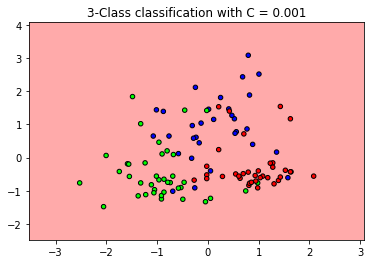

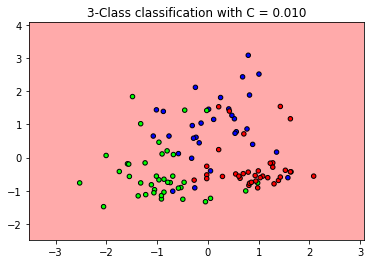

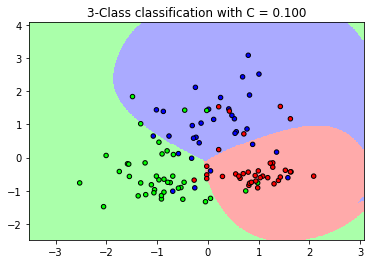

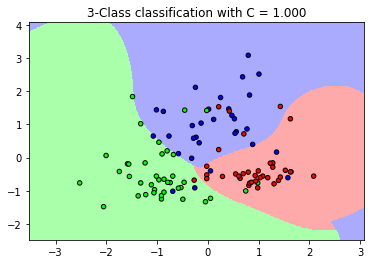

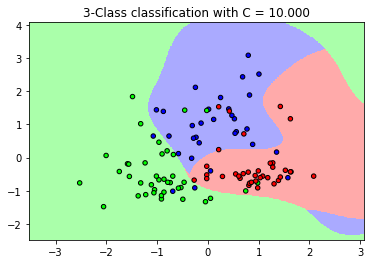

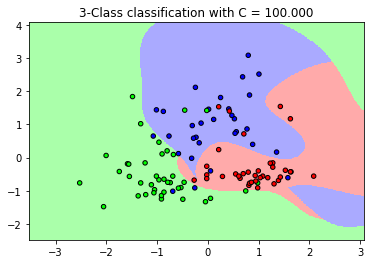

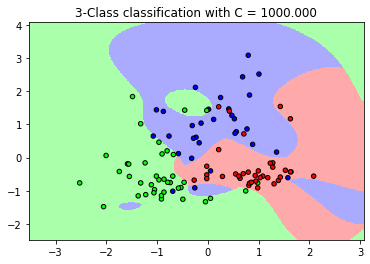

We have the best score on the test set with the value of C = 10.000 and the score is: 0.852


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets, model_selection, svm, preprocessing, metrics 

#lod wine dataset
wine = datasets.load_wine()

#we choose only the first two attributes
X = wine.data[:, :2]
y = wine.target

# divide to get the right percentage of train data
X_t, X_test, y_t, y_test = model_selection.train_test_split(X, y, random_state=np.random.randint(0,100), test_size=0.3)

# divide training total into validation and training
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_t, y_t, random_state=np.random.randint(0,100), test_size=0.14)

#various C values
C_val = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# using a Standard scaler to normalize data since ML algorithms work better on normalized data
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# step size in the mesh - to check what this means
h = .02

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#accurancy array, needed later to plot accurancy of various clf on validation set
acc_arr = []

# for which iterates every C and plots the relative data & decision boundaries 
for c in C_val:
    # we create an instance of Linear SVC and fit the data.
    clf = svm.SVC(kernel='rbf', C=c, gamma='scale')
    # train the classifier on the training set
    clf.fit(X_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    
    #the arange method return evenly spaced data
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # test the classifier on the test set
    # ravel method returns a contigous flattened array
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, 
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification with C = %.3f" %( c)) 
    
    #append accuracy score on validation set to list
    acc_arr.append(clf.score(X_test, y_test))
plt.show()

# choose the best C value based on the test set (13)
C_best_index = acc_arr.index(max(acc_arr))
C_best = C_val[C_best_index]

print("We have the best score on the test set with the value of C = %.3f and the score is: %.3f" %(C_best, max(acc_arr)))


<h3>14. Are there any differences compared to the linear kernel? How are the boundaries different? </h3>
<p> TODO - rispondere </p>

Score on validation set:  0.6666666666666666
Best score of the RBF kernel with the best parameters:  0.8148148148148148


/home/vaelthur/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/vaelthur/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/vaelthur/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/vaelthur/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change fr

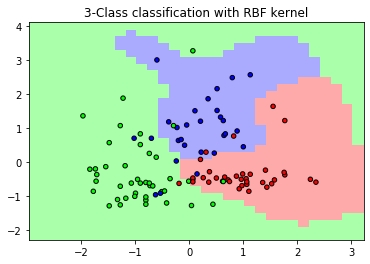

Score with 5-fold cross validation on the test set:  0.8148148148148148


/home/vaelthur/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets, model_selection, svm, metrics
from sklearn.model_selection import GridSearchCV

#load wine dataset
wine = datasets.load_wine()

#we choose only the first two attributes
X = wine.data[:, :2]
y = wine.target

# divide to get the right percentage of train data
X_t, X_test, y_t, y_test = model_selection.train_test_split(X, y, random_state=np.random.randint(0,100), test_size=0.3)

# divide training total into validation and training
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_t, y_t, random_state=np.random.randint(0,100), test_size=0.14)

# using a Standard scaler to normalize data since ML algorithms work better on normalized data
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_t = scaler.transform(X_t)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# step size in the mesh - to check what this means
h = .02

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# select appropriate range of parameters for C and gamma (15)
parameters = [{'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1], 'kernel': ['rbf']}]

clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameters, n_jobs=-1)
clf.fit(X_train, y_train)

# score on the validation set
print("Score on validation set: ", clf.score(X_valid, y_valid))

# choose the best values to evaluate the best paramteres on the test set
best_param = [{'C':[clf.best_estimator_.C], 'gamma':[clf.best_estimator_.gamma], 'kernel': ['rbf']}]

# clf1 is the classifier with the best parameter we got from the Grid search tuning 
clf1 = GridSearchCV(estimator=svm.SVC(), param_grid=best_param, n_jobs=-1) 

# Note: the clf.score() function and the clf1.score() function give the same result if computed
# on the same data set: this means that automatically the best parameters are chosen. 
# I will anyway leave the solution with the clf1 to enhance the fact that is possible to discover
# which are the best parameters through the functions called for the creation of the variable 'best_param'


# print decision boundaries with best attributes
h = 0.2 

clf1.fit(X_train, y_train)

print("Best score of the RBF kernel with the best parameters: ", clf1.score(X_test, y_test))

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    
# the arange method return evenly spaced data
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()]) 

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification with RBF kernel")
 
plt.show()     
  
# grid search for gamma and C but this time with a 5-fold validation (17)  
clf2 = GridSearchCV(estimator=svm.SVC(), param_grid=parameters, n_jobs=-1, cv=5)

# we train this classifier with the 5-fold cross validation on the merged data X_train+X_valid = X_t
clf2.fit(X_t, y_t)   
 
# print best score for classifier 0 with grid search without Kfold and for classifier 2 with Kfold (18)
print("Score with 5-fold cross validation on the test set: ", clf2.score(X_test, y_test))  